In [1]:
# Import statements
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Lightning-strikes.csv')
df.head()

,date,number_of_strikes,center_point_geom
0,2016-08-05,16,POINT(-101.5 24.7)
1,2016-08-05,16,POINT(-85 34.3)
2,2016-08-05,16,POINT(-89 41.4)
3,2016-08-05,16,POINT(-89.8 30.7)
4,2016-08-05,16,POINT(-86.2 37.9)


In [3]:
# Convert the `date` column to datetime.
df['date'] = pd.to_datetime(df['date'])

In [11]:
# Create four new columns.
df['week'] = df['date'].dt.strftime('%Y-W%V')
df['month'] = df['date'].dt.strftime('%Y-%m')
df['quarter'] = df['date'].dt.to_period('Q').dt.strftime('%Y-Q%q')
df['year'] = df['date'].dt.strftime('%Y')

In [12]:
df.head(10)

,date,number_of_strikes,center_point_geom,week,month,quarter,year
0,2016-08-05,16,POINT(-101.5 24.7),2016-W31,2016-08,2016-Q3,2016
1,2016-08-05,16,POINT(-85 34.3),2016-W31,2016-08,2016-Q3,2016
2,2016-08-05,16,POINT(-89 41.4),2016-W31,2016-08,2016-Q3,2016
3,2016-08-05,16,POINT(-89.8 30.7),2016-W31,2016-08,2016-Q3,2016
4,2016-08-05,16,POINT(-86.2 37.9),2016-W31,2016-08,2016-Q3,2016
5,2016-08-05,16,POINT(-97.8 38.9),2016-W31,2016-08,2016-Q3,2016
6,2016-08-05,16,POINT(-81.9 36),2016-W31,2016-08,2016-Q3,2016
7,2016-08-05,16,POINT(-90.9 36.7),2016-W31,2016-08,2016-Q3,2016
8,2016-08-05,16,POINT(-106.6 26.1),2016-W31,2016-08,2016-Q3,2016
9,2016-08-05,16,POINT(-108 31.6),2016-W31,2016-08,2016-Q3,2016


In [13]:
# Create a new dataframe view of just 2018 data, summed by week.
df_by_week_2018 = df[df['year'] == '2018'].groupby(['week']).sum().reset_index()
df_by_week_2018.head()

,week,number_of_strikes
0,2018-W01,34843
1,2018-W02,353425
2,2018-W03,37132
3,2018-W04,412772
4,2018-W05,34972


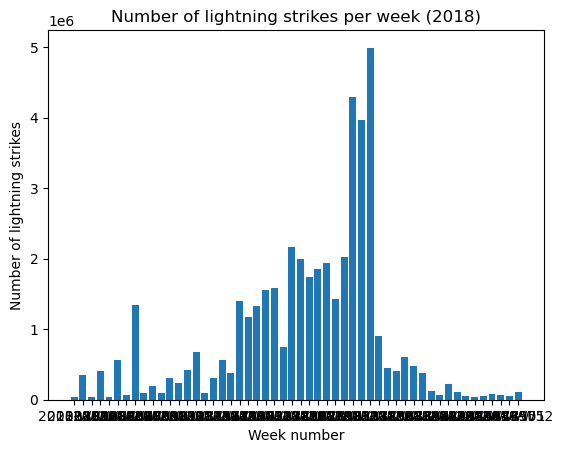

In [14]:
# Plot a bar graph of weekly strike totals in 2018.
plt.bar(x = df_by_week_2018['week'], height = df_by_week_2018['number_of_strikes'])
plt.plot()
plt.xlabel("Week number")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per week (2018)");

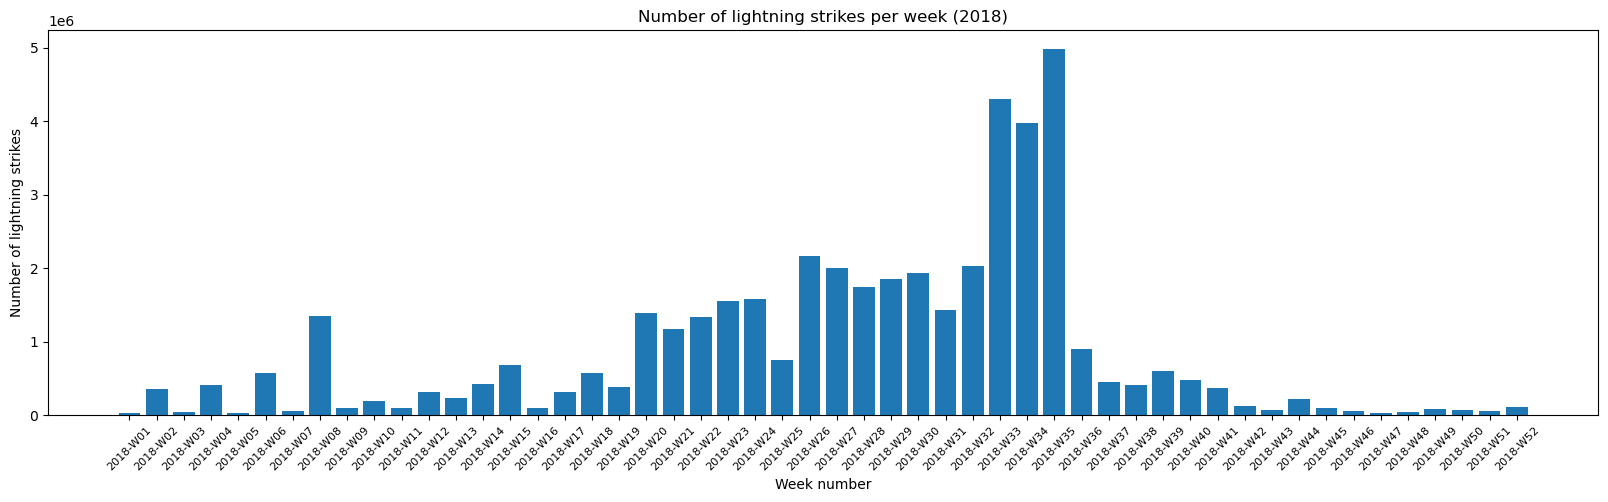

In [15]:
# Increase output size.
plt.figure(figsize = (20, 5)) 
plt.bar(x = df_by_week_2018['week'], height = df_by_week_2018['number_of_strikes'])
plt.plot()
plt.xlabel("Week number")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per week (2018)")
plt.xticks(rotation = 45, fontsize = 8) # Rotate x-axis labels and decrease font size.

plt.show()

In [16]:
#plot the number of lightning strikes from 2016-2018
df_by_quarter = df['number_of_strikes'].div(1000000)
df_by_quarter.head()

0    0.000016
1    0.000016
2    0.000016
3    0.000016
4    0.000016
Name: number_of_strikes, dtype: float64

In [17]:
# Group 2016-2018 data by quarter and sum.
df_by_quarter = df.groupby(['quarter']).sum().reset_index()

# Format as text, in millions.
df_by_quarter['number_of_strikes_formatted'] = df_by_quarter['number_of_strikes'].div(1000000).round(1).astype(str) + 'M'

df_by_quarter.head()

,quarter,number_of_strikes,number_of_strikes_formatted
0,2016-Q1,2683798,2.7M
1,2016-Q2,15084857,15.1M
2,2016-Q3,21843820,21.8M
3,2016-Q4,1969754,2.0M
4,2017-Q1,2444279,2.4M


In [18]:
#write a function that will help label each bar in the plot with its corresponding number_of_strikes_formatted text.

def addlabels(x, y, labels):
    '''
    Iterates over data and plots text labels above each bar of bar graph.
    '''
    for i in range(len(x)):
        plt.text(i, y[i], labels[i], ha = 'center', va = 'bottom')

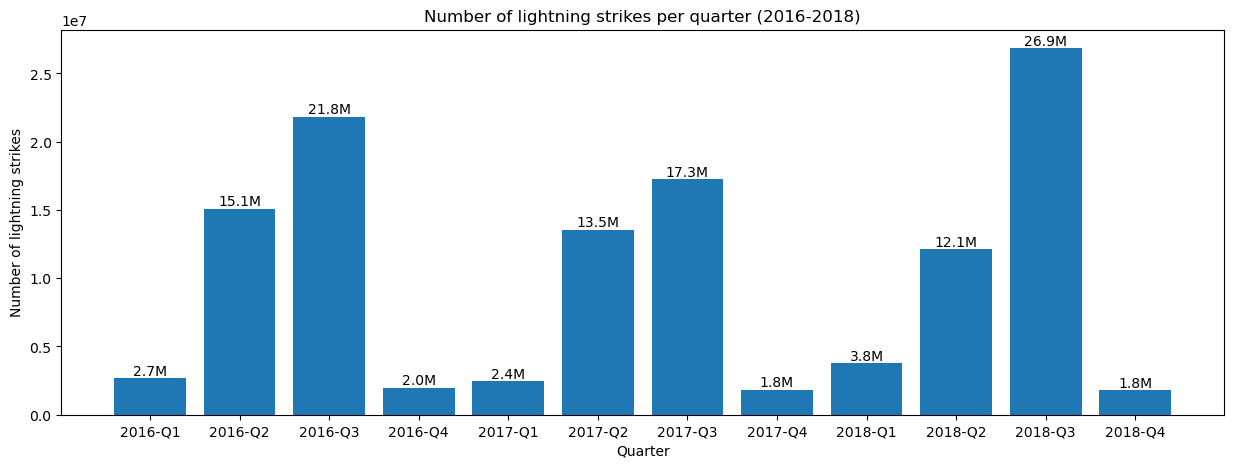

In [19]:
plt.figure(figsize = (15, 5))
plt.bar(x = df_by_quarter['quarter'], height = df_by_quarter['number_of_strikes'])
addlabels(df_by_quarter['quarter'], df_by_quarter['number_of_strikes'], df_by_quarter['number_of_strikes_formatted'])
plt.plot()
plt.xlabel('Quarter')
plt.ylabel('Number of lightning strikes')
plt.title('Number of lightning strikes per quarter (2016-2018)')
plt.show()

In [20]:
#creating a grouped bar chart.
# Create two new columns.
df_by_quarter['quarter_number'] = df_by_quarter['quarter'].str[-2:]
df_by_quarter['year'] = df_by_quarter['quarter'].str[:4]
df_by_quarter.head()

,quarter,number_of_strikes,number_of_strikes_formatted,quarter_number,year
0,2016-Q1,2683798,2.7M,Q1,2016
1,2016-Q2,15084857,15.1M,Q2,2016
2,2016-Q3,21843820,21.8M,Q3,2016
3,2016-Q4,1969754,2.0M,Q4,2016
4,2017-Q1,2444279,2.4M,Q1,2017


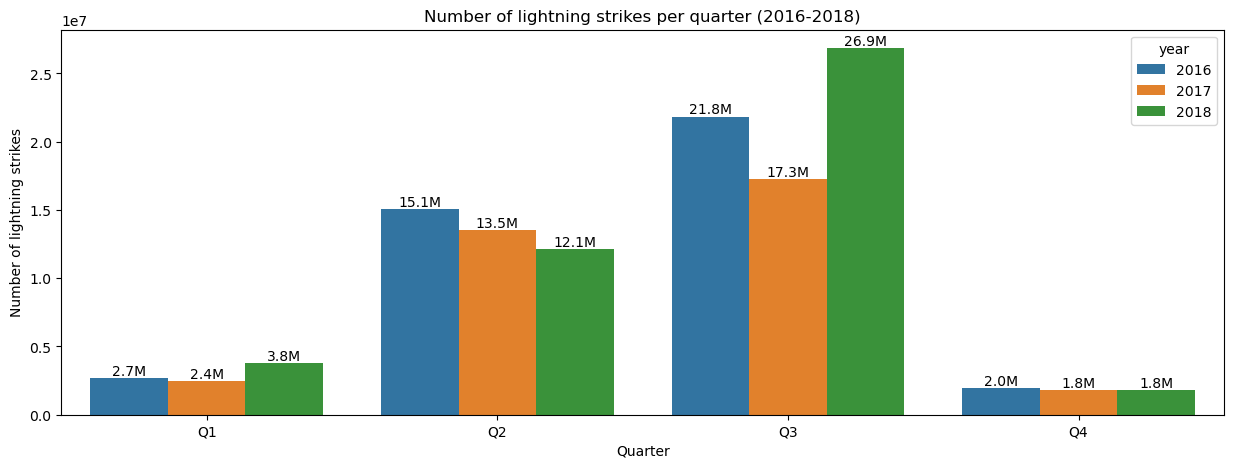

In [21]:
#filling in the chart parameters
plt.figure(figsize = (15, 5))
p = sns.barplot(
    data = df_by_quarter,
    x = 'quarter_number',
    y = 'number_of_strikes',
    hue = 'year')
for b in p.patches:
    p.annotate(str(round(b.get_height()/1000000, 1))+'M', 
                   (b.get_x() + b.get_width() / 2., b.get_height() + 1.2e6), 
                   ha = 'center', va = 'bottom', 
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.xlabel("Quarter")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per quarter (2016-2018)")
plt.show()